<a href="https://colab.research.google.com/github/Tasmia062/CSE-475-4--2021-2-60-062/blob/main/CSE475_Lab03_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Cyber Threat Detection

Dataset Link: https://www.kaggle.com/datasets/hussainsheikh03/cyber-threat-detection

# Loading Libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


#These are popular ensemble methods used for classification (RandomForestClassifier, GradientBoostingClassifier)
#This is an ensemble model that combines multiple classifiers to
#improve prediction accuracy (VotingClassifier)

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier

#A simple and widely used
#linear classifier, commonly used as a baseline in classification tasks.

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

#Used to standardize features by removing the mean and
#scaling to unit variance, which improves model performance(StandardScaler)

#Used to transform categorical data into a numerical format by encoding
#categorical variables as binary (one-hot) vectors(OneHotEncoder)

from sklearn.preprocessing import StandardScaler, OneHotEncoder

#A powerful tool for transforming specific columns in a dataframe,
#often used to apply different preprocessing steps to numerical
#and categorical columns.
from sklearn.compose import ColumnTransformer


# Load Dataset

In [3]:
df = pd.read_csv('/content/drive/MyDrive/cyberfeddefender_dataset.csv')
df.head()

Timestamp    Source_IP Destination_IP Protocol  Packet_Length  \
0  2024-10-23 12:00:00  192.168.0.1    192.168.0.1     ICMP           1155   
1  2024-10-23 12:00:01  192.168.0.7     172.16.0.5     ICMP           1776   
2  2024-10-23 12:00:02  192.168.0.7       10.0.0.3      UDP            627   
3  2024-10-23 12:00:03  192.168.0.7       10.0.0.3      UDP           1754   
4  2024-10-23 12:00:04  192.168.0.1       10.0.0.4      UDP           1326   

   Duration  Source_Port  Destination_Port  Bytes_Sent  Bytes_Received  ...  \
0      4.01           53                53         675             877  ...   
1      3.75           22                22         297            1062  ...   
2      4.24           80              8080         122             723  ...   
3      3.09          443               443        1626            1703  ...   
4      2.52           80               443        1851             771  ...   

  Avg_Packet_Size  Total_Fwd_Packets  Total_Bwd_Packets  Fwd_Header_Length  \
0             512                 21                 34                256   
1            1024                 14                 19                512   
2             512                 10                 41                512   
3             256                 37                 44                128   
4            1024                 40                 16                512   

   Bwd_Header_Length  Sub_Flow_Fwd_Bytes  Sub_Flow_Bwd_Bytes  Inbound  \
0                256                 697                1028        1   
1                256                 513                1300        1   
2                256                 250                 497        0   
3                256                 985                1471        0   
4                256                1877                 595        1   

   Attack_Type  Label  
0         DDoS      1  
1         DDoS      1  
2         DDoS      1  
3   Ransomware      0  
4       Normal      1  

[5 rows x 23 columns]

In [4]:
df

Timestamp    Source_IP Destination_IP Protocol  Packet_Length  \
0     2024-10-23 12:00:00  192.168.0.1    192.168.0.1     ICMP           1155   
1     2024-10-23 12:00:01  192.168.0.7     172.16.0.5     ICMP           1776   
2     2024-10-23 12:00:02  192.168.0.7       10.0.0.3      UDP            627   
3     2024-10-23 12:00:03  192.168.0.7       10.0.0.3      UDP           1754   
4     2024-10-23 12:00:04  192.168.0.1       10.0.0.4      UDP           1326   
...                   ...          ...            ...      ...            ...   
1425  2024-10-23 12:23:45     10.0.0.9       10.0.0.3      UDP           1260   
1426  2024-10-23 12:23:46     10.0.0.9     172.16.0.5      TCP            362   
1427  2024-10-23 12:23:47   172.16.0.4       10.0.0.3      TCP           1236   
1428  2024-10-23 12:23:48  172.16.0.10     172.16.0.4      UDP           1962   
1429  2024-10-23 12:23:49   172.16.0.3       10.0.0.4      UDP           1221   

      Duration  Source_Port  Destination_Port  Bytes_Sent  Bytes_Received  \
0         4.01           53                53         675             877   
1         3.75           22                22         297            1062   
2         4.24           80              8080         122             723   
3         3.09          443               443        1626            1703   
4         2.52           80               443        1851             771   
...        ...          ...               ...         ...             ...   
1425      0.46           22              8080         722             626   
1426      2.02         8080                22         571            1006   
1427      2.11         8080                80        1194             185   
1428      1.10          443              8080         176             766   
1429      2.77           53              8080        1453            1136   

      ... Avg_Packet_Size  Total_Fwd_Packets  Total_Bwd_Packets  \
0     ...             512                 21                 34   
1     ...            1024                 14                 19   
2     ...             512                 10                 41   
3     ...             256                 37                 44   
4     ...            1024                 40                 16   
...   ...             ...                ...                ...   
1425  ...             256                 37                 17   
1426  ...            1024                 27                 24   
1427  ...             512                 15                 46   
1428  ...              64                 27                 27   
1429  ...              64                 26                 18   

      Fwd_Header_Length  Bwd_Header_Length  Sub_Flow_Fwd_Bytes  \
0                   256                256                 697   
1                   512                256                 513   
2                   512                256                 250   
3                   128                256                 985   
4                   512                256                1877   
...                 ...                ...                 ...   
1425                512                512                1021   
1426                128                128                 381   
1427                256                256                1064   
1428                256                256                1121   
1429                128                512                 646   

      Sub_Flow_Bwd_Bytes  Inbound  Attack_Type  Label  
0                   1028        1         DDoS      1  
1                   1300        1         DDoS      1  
2                    497        0         DDoS      1  
3                   1471        0   Ransomware      0  
4                    595        1       Normal      1  
...                  ...      ...          ...    ...  
1425                1996        1   Ransomware      1  
1426                 260        1       Normal      1  
1427            

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1430 entries, 0 to 1429
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Timestamp           1430 non-null   object 
 1   Source_IP           1430 non-null   object 
 2   Destination_IP      1430 non-null   object 
 3   Protocol            1430 non-null   object 
 4   Packet_Length       1430 non-null   int64  
 5   Duration            1430 non-null   float64
 6   Source_Port         1430 non-null   int64  
 7   Destination_Port    1430 non-null   int64  
 8   Bytes_Sent          1430 non-null   int64  
 9   Bytes_Received      1430 non-null   int64  
 10  Flags               1430 non-null   object 
 11  Flow_Packets/s      1430 non-null   float64
 12  Flow_Bytes/s        1430 non-null   float64
 13  Avg_Packet_Size     1430 non-null   int64  
 14  Total_Fwd_Packets   1430 non-null   int64  
 15  Total_Bwd_Packets   1430 non-null   int64  
 16  Fwd_He

# Data Preprocessing

In [6]:
X = df.drop(['Label'], axis=1)
print(X)
#This operation reduces each class label by 1, assuming
#class labels originally start from 1. If classes were
#initially numbered as 1, 2, 3, etc., they’ll now be 0, 1, 2, etc.



#Many machine learning algorithms in Python
#(especially in libraries like scikit-learn)
#expect class labels to start from 0. This
#adjustment simplifies compatibility with
#these algorithms and avoids indexing issues.
# y = df['Label']-1
y = df['Label']

#Identifying Feature Types:

# Split the features into categorical and numerical

#Selects the columns containing categorical data
categorical_features = X.select_dtypes(include=['object']).columns

#Selects columns containing numerical data
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns


#Data Preprocessing:

# Standard scaling for numerical features only

#will adjust the data so that each feature has
#a mean of 0 and a standard deviation of 1.
scaler = StandardScaler()

#first learns the mean and standard deviation for
#each numerical feature in X.
#This helps ensure that all numerical features are on a similar scale.

#this process centers the data around zero and adjusts the scale,
#which often improves the performance of machine learning models
#by preventing any one feature from dominating due to its larger scale.
scaled_numerical_data = scaler.fit_transform(X[numerical_features])

# One-hot encoding for categorical features only

#The OneHotEncoder converts categorical variables
#into binary (one-hot) encoded variables.
encoder = OneHotEncoder(drop='first')
encoded_categorical_data = encoder.fit_transform(X[categorical_features])

# Concatenate the scaled numerical and encoded categorical data

#Concatenates the scaled numerical and encoded categorical arrays horizontally,
#combining them into a single dataset.
processed_data = np.hstack([scaled_numerical_data, encoded_categorical_data.toarray()])

# Convert to DataFrame with appropriate column names
final_columns = numerical_features.tolist() + encoder.get_feature_names_out(categorical_features).tolist()
final_df = pd.DataFrame(processed_data, columns=final_columns)

#Stores the preprocessed features in data_X for modeling
data_X = final_df.copy()

                Timestamp    Source_IP Destination_IP Protocol  Packet_Length  \
0     2024-10-23 12:00:00  192.168.0.1    192.168.0.1     ICMP           1155   
1     2024-10-23 12:00:01  192.168.0.7     172.16.0.5     ICMP           1776   
2     2024-10-23 12:00:02  192.168.0.7       10.0.0.3      UDP            627   
3     2024-10-23 12:00:03  192.168.0.7       10.0.0.3      UDP           1754   
4     2024-10-23 12:00:04  192.168.0.1       10.0.0.4      UDP           1326   
...                   ...          ...            ...      ...            ...   
1425  2024-10-23 12:23:45     10.0.0.9       10.0.0.3      UDP           1260   
1426  2024-10-23 12:23:46     10.0.0.9     172.16.0.5      TCP            362   
1427  2024-10-23 12:23:47   172.16.0.4       10.0.0.3      TCP           1236   
1428  2024-10-23 12:23:48  172.16.0.10     172.16.0.4      UDP           1962   
1429  2024-10-23 12:23:49   172.16.0.3       10.0.0.4      UDP           1221   

      Duration  Source_Port

In [7]:
data_X.head()

Packet_Length  Duration  Source_Port  Destination_Port  Bytes_Sent  \
0       0.158116  1.002933    -0.518778         -0.548299   -0.598910   
1       1.243329  0.819803    -0.528704         -0.557766   -1.262999   
2      -0.764578  1.164934    -0.510132          1.902922   -1.570447   
3       1.204884  0.354933    -0.393901         -0.429204    1.071853   
4       0.456943 -0.046546    -0.510132         -0.429204    1.467144   

   Bytes_Received  Flow_Packets/s  Flow_Bytes/s  Avg_Packet_Size  \
0       -0.294651        1.494581     -0.866983         0.143834   
1        0.028793        1.483178      0.053288         1.563555   
2       -0.563896       -1.424568     -1.301150         0.143834   
3        1.149480       -0.637766      1.499149        -0.566027   
4       -0.479975       -0.979854     -1.715930         1.563555   

   Total_Fwd_Packets  ...  Destination_IP_192.168.0.1  \
0          -0.718279  ...                         1.0   
1          -1.325592  ...                         0.0   
2          -1.672628  ...                         0.0   
3           0.669864  ...                         0.0   
4           0.930141  ...                         0.0   

   Destination_IP_192.168.0.2  Protocol_TCP  Protocol_UDP  Flags_FIN  \
0                         0.0           0.0           0.0        0.0   
1                         0.0           0.0           0.0        0.0   
2                         0.0           0.0           1.0        0.0   
3                         0.0           0.0           1.0        1.0   
4                         0.0           0.0           1.0        0.0   

   Flags_PSH  Flags_SYN  Attack_Type_DDoS  Attack_Type_Normal  \
0        0.0        1.0               1.0                 0.0   
1        0.0        0.0               1.0                 0.0   
2        0.0        0.0               1.0                 0.0   
3        0.0        0.0               0.0                 0.0   
4        1.0        0.0               0.0                 1.0   

   Attack_Type_Ransomware  
0                     0.0  
1                     0.0  
2                     0.0  
3                     1.0  
4                     0.0  

[5 rows x 1466 columns]

In [8]:
X = data_X
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training

## Bagging Approach: Random Forest

In [12]:
#Random Forest Classifier Initialization
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
#Training the Model
rf_model.fit(X_train, y_train)
#Making Predictions
rf_pred = rf_model.predict(X_test)
#Evaluating the Model
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))

Random Forest Accuracy: 0.5174825174825175


## Boosting Approach: Gradient Boosting

In [13]:
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)
print("Gradient Boosting Accuracy:", accuracy_score(y_test, gb_pred))

Gradient Boosting Accuracy: 0.5209790209790209


## Stacking Approach

In [14]:
from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
#The stacking model uses a list of base learners—Random Forest,
#Gradient Boosting, and XGBoost classifiers—each with 100 estimators
#and a fixed random state for reproducibility.
# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)
# Define base models
base_learners = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=100, random_state=42)),
    ('xgb', XGBClassifier(n_estimators=100, random_state=42))
]

# Define meta-learner

# Logistic Regression is chosen as the meta-learner,
#which combines the predictions from the base learners to make final predictions. The meta-learner is often a simpler model (e.g., Logistic Regression or Decision Tree)
#that helps synthesize the information from the base models.
meta_learner = LogisticRegression()

# Set up the stacking model

#This line initializes the stacking classifier,
#which combines the base models and uses the meta-learner
#for final predictions. Cross-validation (cv=5) is
#used within the stacking process to improve robustness.
stacking_model = StackingClassifier(estimators=base_learners, final_estimator=meta_learner, cv=5)

stacking_model.fit(X_train_balanced, y_train_balanced)
stacking_pred = stacking_model.predict(X_test)
print("Stacking Model Accuracy:", accuracy_score(y_test, stacking_pred))

# Define meta-learner
meta_learner = LogisticRegression()

# Set up the stacking model
stacking_model = StackingClassifier(estimators=base_learners, final_estimator=meta_learner, cv=2)
stacking_model.fit(X_train, y_train)

Stacking Model Accuracy: 0.513986013986014


StackingClassifier(cv=2,
                   estimators=[('rf', RandomForestClassifier(random_state=42)),
                               ('gb',
                                GradientBoostingClassifier(random_state=42)),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              fea...
                                              interaction_constraints=None,
                                              learning_rate=None, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=100, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=42, ...))],
                   final_estimator=LogisticRegression())

# **- Combine multiple classifiers by voting**

In [15]:
#This ensemble model combines several base models—Random Forest,
#Gradient Boosting, and Support Vector Classifier (SVC)—to
#make predictions. The voting='soft' parameter indicates that
#the classifier will use the probabilities predicted by each model
#and then average them to make final predictions.
#This "soft voting" often yields better results when
#the models provide probability estimates.


vote_model = VotingClassifier(
    estimators=[
        ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
        ('gb', GradientBoostingClassifier(n_estimators=100, random_state=42)),
        ('svc', SVC(probability=True))
    ],
    voting='soft'
)
vote_model.fit(X_train, y_train)
vote_pred = vote_model.predict(X_test)
print("Voting Classifier Accuracy:", accuracy_score(y_test, vote_pred))

Voting Classifier Accuracy: 0.5209790209790209


## Evaluation

In [16]:
print("Random Forest:", accuracy_score(y_test, rf_pred))
print("Gradient Boosting:", accuracy_score(y_test, gb_pred))
print("Stacking Model:", accuracy_score(y_test, stacking_pred))
print("Voting Classifier:", accuracy_score(y_test, vote_pred))

Random Forest: 0.5174825174825175
Gradient Boosting: 0.5209790209790209
Stacking Model: 0.513986013986014
Voting Classifier: 0.5209790209790209


# Cross-Validation Performance Comparison
* Use cross_val_score from sklearn.model_selection to perform cross-validation and evaluate each ensemble model's accuracy across folds.
* Set cv=5 for 5-fold cross-validation (can be adjusted based on preference or dataset size).

1. Model Definitions:
You define four models: Random Forest, Gradient Boosting, Stacking, and Voting.

Each model is instantiated with specific configurations:

Random Forest and Gradient Boosting are set up with 100 estimators.

Stacking combines Random Forest and SVC, with Logistic Regression as the meta-learner.

Voting combines Random Forest, Gradient Boosting, and SVC using soft voting (i.e., probability averaging).

In [17]:
from sklearn.model_selection import cross_val_score

# Define models
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "Stacking": StackingClassifier(
        estimators=[
            ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
            ('svc', SVC(probability=True))
        ],
        final_estimator=LogisticRegression()
    ),
    "Voting": VotingClassifier(
        estimators=[
            ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
            ('gb', GradientBoostingClassifier(n_estimators=100, random_state=42)),
            ('svc', SVC(probability=True))
        ],
        voting='soft'
    )
}

# Perform cross-validation and store results

#scores.mean() gives the average accuracy across all folds.
#scores.std() provides the variability in accuracy between the folds.
results = {}
for model_name, model in models.items():
    scores = cross_val_score(model, data_X, y, cv=2, scoring='accuracy')
    results[model_name] = scores
    print(f"{model_name} Cross-Validation Accuracy: {scores.mean():.4f} ± {scores.std():.4f}")


Random Forest Cross-Validation Accuracy: 0.4923 ± 0.0224
Gradient Boosting Cross-Validation Accuracy: 0.5035 ± 0.0126
Stacking Cross-Validation Accuracy: 0.5042 ± 0.0077
Voting Cross-Validation Accuracy: 0.4993 ± 0.0056


## Visualizing Cross-Validation Results

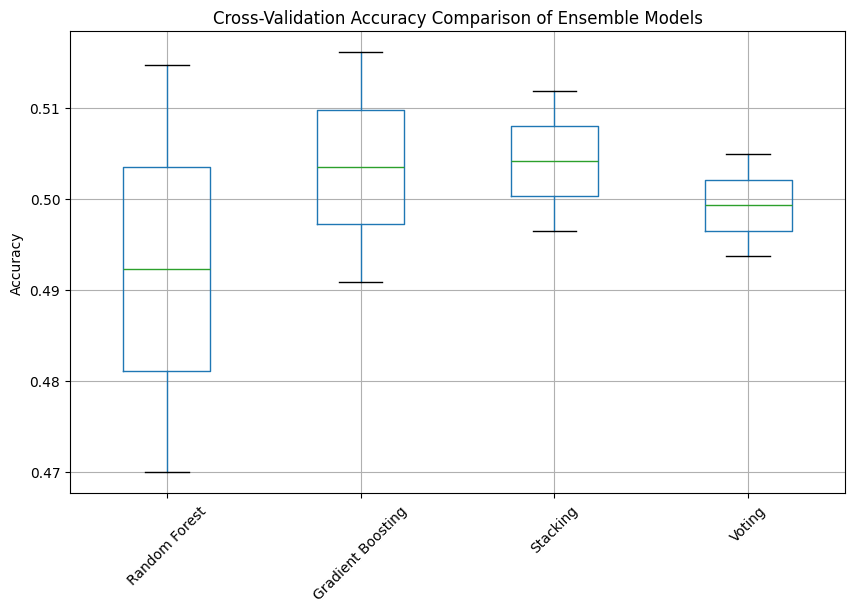

In [19]:
import matplotlib.pyplot as plt

# Prepare results for visualization
import pandas as pd

#converted into a pandas DataFrame (results_df).
#This allows for easier manipulation and visualization.
results_df = pd.DataFrame(results)

# Plot box plot for model comparison
plt.figure(figsize=(10, 6))
results_df.boxplot()
plt.title("Cross-Validation Accuracy Comparison of Ensemble Models")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.show()



## Confusion Matrix for Each Model

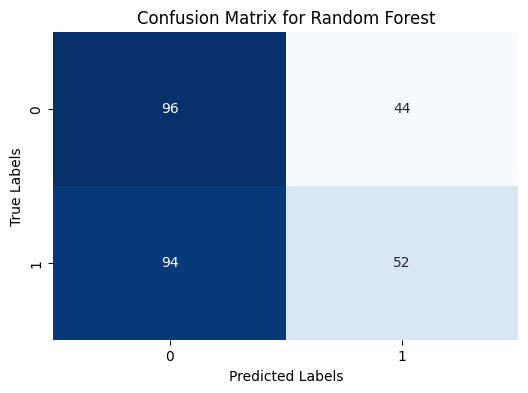

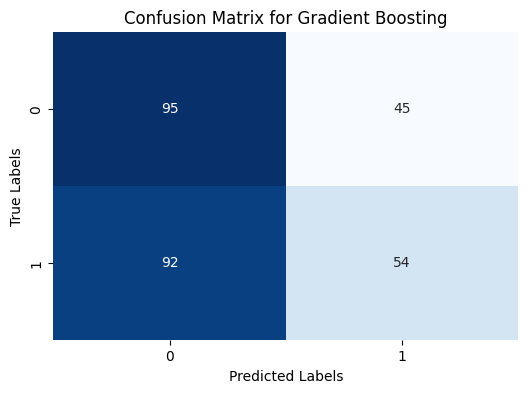

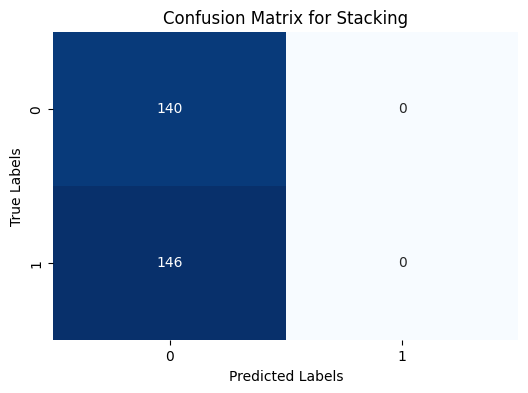

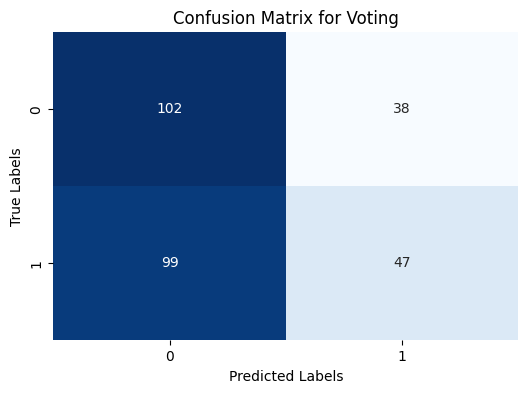

In [20]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Fit each model on the training data and plot the confusion matrix for each
for model_name, model in models.items():
    # Fit the model and predict on test set
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()


The image shows confusion matrices for "Random Forest", "Gradient Boosting", "Stacking" and "Voting" model.

1. **Random Forest**: The model shows reasonable performance in detecting positives with 96 true positives, but its false positive count (44) and false negative count (94) indicate challenges in accurately distinguishing between classes, particularly in identifying negatives.  

2. **Gradient Boosting**: The model performs similarly to Random Forest with 95 true positives and slightly fewer false negatives (92). However, its false positive count (45) suggests room for improvement in minimizing misclassifications of negatives as positives. Overall, its performance is marginally better in identifying positives.  

3. **Stacking**: The model predicted no negatives, as both true negatives (0) and false positives (0) are absent. It correctly identified 140 positives (true positives) but missed 146 actual positives (false negatives). This indicates poor balance, as it fails entirely to classify any negatives, focusing only on positive predictions.

4. **Voting**: The model correctly identified 47 negatives (true negatives) but misclassified 38 negatives as positives (false positives). It identified 102 positives (true positives) but missed 99 actual positives (false negatives). While it shows better balance than Stacking, its performance is limited by a relatively high false negative count, indicating difficulty in capturing all positive cases.

## Precision and Recall for Each Model

In [21]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Fit each model on the training data and calculate precision, recall, and F1-score
for model_name, model in models.items():
    # Fit the model and predict on test set
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate precision, recall, and F1-score
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Print the metrics
    print(f"{model_name} Performance Metrics:")
    print(f" - Precision: {precision:.4f}")
    print(f" - Recall: {recall:.4f}")
    print(f" - F1 Score: {f1:.4f}\n")


Random Forest Performance Metrics:
 - Precision: 0.5238
 - Recall: 0.5175
 - F1 Score: 0.5042

Gradient Boosting Performance Metrics:
 - Precision: 0.5271
 - Recall: 0.5210
 - F1 Score: 0.5095



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Stacking Performance Metrics:
 - Precision: 0.2396
 - Recall: 0.4895
 - F1 Score: 0.3217

Voting Performance Metrics:
 - Precision: 0.5307
 - Recall: 0.5210
 - F1 Score: 0.5006



## Summary of Metrics

In [22]:
# Collect all metrics in a DataFrame for summary
metrics_summary = []

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    metrics_summary.append({
        "Model": model_name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    })

# Convert to DataFrame
import pandas as pd
metrics_df = pd.DataFrame(metrics_summary)

# Display the summary
print("Model Performance Summary:")
metrics_df

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Model Performance Summary:


Model  Accuracy  Precision    Recall  F1 Score
0      Random Forest  0.517483   0.523847  0.517483  0.504190
1  Gradient Boosting  0.520979   0.527131  0.520979  0.509457
2           Stacking  0.489510   0.239621  0.489510  0.321744
3             Voting  0.527972   0.538422  0.527972  0.509285

***Summary :***
1. Gradient Boosting shows the most balanced performance, with slightly better F1 scores.

2. Stacking performs poorly across all metrics, especially in precision.

3. Voting achieves the highest precision but slightly lower overall balance than Gradient Boosting.

4. Random Forest is comparable but slightly less effective than Gradient Boosting and Voting.

# Explainable AI (XAI)

## Explaining Model Predictions Using SHAP
SHAP provides detailed insights into feature contributions for individual predictions and the overall model. We'll compute SHAP values for the Random Forest model as an example, but this approach can be extended to other models as well.

**How SHAP Works with Different Ensemble Models**

**Bagging Models (e.g., Random Forest)**

For bagging models, SHAP’s TreeExplainer efficiently computes SHAP values across each tree in the ensemble, averaging feature contributions to provide both global and local interpretability. This is useful for understanding which features are consistently important across all trees in a Random Forest.

**Boosting Models (e.g., Gradient Boosting, XGBoost)**

Boosting models like XGBoost use sequential training, where each iteration corrects the mistakes of the previous model. SHAP’s explanations reveal how feature importance evolves over iterations, highlighting which features the model focuses on as it learns. SHAP also captures the impact of feature interactions within the model’s complex structure.

**Stacking Models**

In stacking, where multiple base models feed into a meta-learner, SHAP can explain the contribution of each base model's predictions to the final outcome. Additionally, SHAP can be applied to each base model individually, revealing how each model uses features to make predictions, and how the meta-learner combines these predictions.

**Voting Classifier**

Although SHAP cannot directly interpret the aggregated predictions in a voting classifier, it can explain each base model individually, helping to understand how each model contributes to the ensemble’s overall decision. By comparing SHAP values across models, you can see how each one votes differently for features and identify potential model disagreements.

In [24]:
import shap

# Use a subset of the data for SHAP to reduce computation time

#This code uses SHAP to explain the predictions of the Random Forest model
#on a subset of the test data.
X_sample = X_test.sample(100, random_state=42)


# Initialize SHAP explainer for the Random Forest model

#This initializes a TreeExplainer for the Random Forest model. The TreeExplainer is efficient
#for tree-based models (like Random Forest) and computes SHAP values to explain the output of
#individual predictions.
explainer = shap.TreeExplainer(models["Random Forest"])

#This computes the SHAP values for each feature in the sample data.
#The SHAP values represent how much each feature contributes to the difference between the prediction
#and the expected output (mean prediction).
shap_values = explainer.shap_values(X_sample, check_additivity=False)

# illustrates the feature importance in terms of the average impact each feature has on the model's predictions

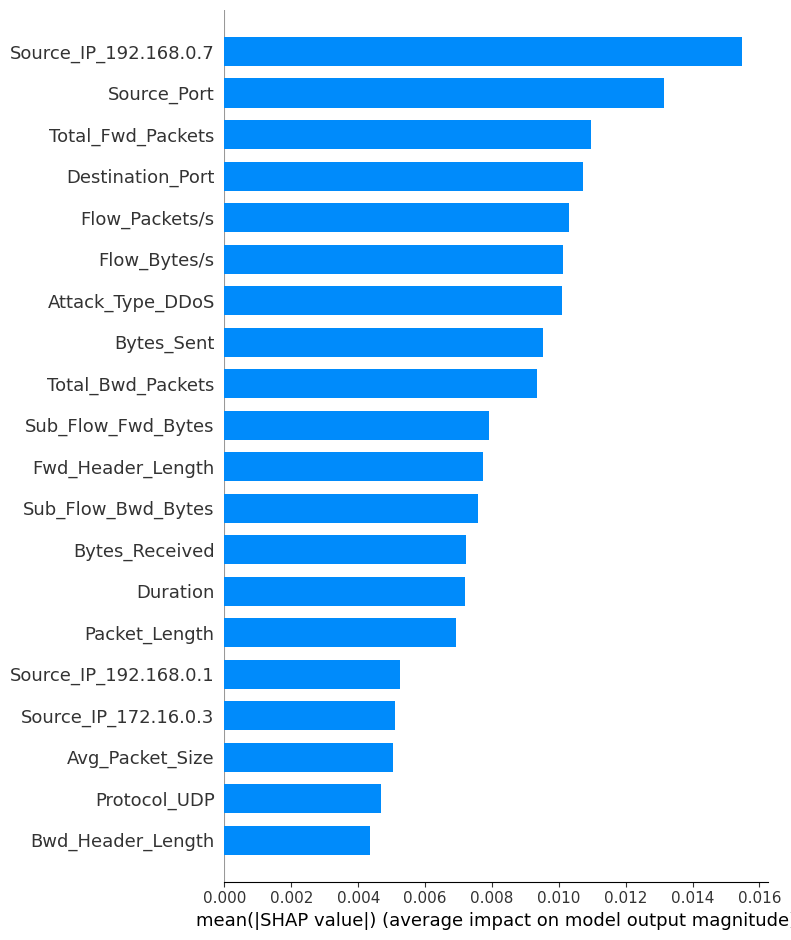

In [25]:
import numpy as np

# Calculate mean absolute SHAP values across all classes for each feature

#This step calculates the mean absolute SHAP value for each feature.

#The shap_values array contains the SHAP values for all instances in X_sample,
#and by taking the absolute value and averaging across all instances, we get
#an overall measure of each feature's contribution to the model's predictions.

mean_shap_values = np.mean([np.abs(sv) for sv in shap_values], axis=0)  # Resulting shape should be (100, 12) to match X_sample

# If mean_shap_values is (12, 5), take the mean across classes, resulting in a vector (12, )

#If there are multiple classes (for multi-class classification), this line computes the mean
#SHAP value across all classes, collapsing the results to a single value for each feature.

mean_shap_values = np.mean(mean_shap_values, axis=1)



# Repeat this vector to create a matrix that matches X_sample's shape

#This step repeats the mean_shap_values for each row in the sample data.
#This is necessary to create a shape that matches the original X_sample for visualization.
mean_shap_values_repeated = np.tile(mean_shap_values, (X_sample.shape[0], 1))


# Plot the summary plot with the repeated matrix
shap.summary_plot(mean_shap_values_repeated, X_sample, plot_type="bar", feature_names=X_sample.columns)


Insights from the shap plot :

1. Source_IP_192.168.0.7 is the most influential feature, having the highest average impact on model predictions.

2. Source_Port, Total_Fwd_Packets, and Destination_Port also significantly contribute to the model, indicating that source/destination and packet-related metrics are critical.

3. Features such as Protocol_UDP and Bwd_Header_Length have lower importance, contributing less to the model's output.

## Explaining Model Predictions Using LIME

In [26]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 12.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=afbcf8378abd86d24b28a848a44cc106cbb63ae9afb070df8988ccb369c9b951
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


# **LIME's LimeTabularExplainer provides a simple way to explain individual predictions of a model by approximating it locally with an interpretable model, highlighting the most influential features for that prediction.**

In [27]:
from lime.lime_tabular import LimeTabularExplainer

# Initialize the LIME explainer
lime_explainer = LimeTabularExplainer(X_train.values, feature_names=data_X.columns, class_names=y.values, mode='classification')

# Choose a sample from the test set to explain
sample_index = 0 # Adjust to analyze a different sample

#Generate the Explanation
#This generates a local explanation for the chosen test instance using the Random Forest model’s predicted probabilities

exp = lime_explainer.explain_instance(X_test.values[sample_index], models["Random Forest"].predict_proba, num_features=10)
print(X_test.values[sample_index])
# Display the explanation
exp.show_in_notebook()
exp.show_in_notebook(show_table=True, show_all=False)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


[-1.28009806 -1.57498283 -0.51013244 ...  0.          1.
  0.        ]


In [28]:
from lime.lime_tabular import LimeTabularExplainer
import numpy as np

# Choose a valid sample index
sample_index = 6  # Replace with a valid index, or use np.random.randint(0, len(X_test))


# Ensure feature_names and class_names are valid strings
feature_names = final_columns

# Ensure that class names in LIME are ordered the same way as the model output
class_names = [str(cls) for cls in sorted(y.unique())]  # Sorting the class labels to ensure correct order

# Initialize the LIME explainer with the corrected class names
lime_explainer = LimeTabularExplainer(
    X_train.values,
    feature_names=feature_names,
    class_names=class_names,
    mode='classification'
)

# Generate the explanation again
exp = lime_explainer.explain_instance(
    X_test.values[sample_index],
    models["Random Forest"].predict_proba,
    num_features=10
)

# Display the explanation
exp.show_in_notebook(show_table=True, show_all=False)

# Print the selected sample's feature values
print("\n\nFeature values of the selected sample:")
print(X_test.values[sample_index])

# Get the actual class of the selected sample
actual_class = y_test.values[sample_index]
print(f"Actual class: {actual_class}")

# Get the predicted class of the selected sample
predicted_class = models["Random Forest"].predict(X_test.values[sample_index].reshape(1, -1))[0]
print(f"Predicted class: {predicted_class}")

# Get the predicted probabilities of the selected sample
predicted_probabilities = models["Random Forest"].predict_proba(X_test.values[sample_index].reshape(1, -1))[0]
print(f"Predicted probabilities: {predicted_probabilities}")

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(




Feature values of the selected sample:
[ 0.65441296 -0.47619884 -0.51013244 ...  1.          0.
  0.        ]
Actual class: 0
Predicted class: 1
Predicted probabilities: [0.43 0.57]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
